In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3 as sq
sns.set()
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
buoy = 41013

In [14]:
params = 'txt'
base = 'http://www.ndbc.noaa.gov/data/realtime2/'
link = base + str(buoy) + '.' + params

#combine the first five date columns YY MM DD hh mm and make index
df = pd.read_csv(link, delim_whitespace=True, na_values='MM', 
    parse_dates=[[0,1,2,3,4]], index_col=0)

try:
    #first column is units, so drop it
    df.drop(df.index[0], inplace=True)
    #convert the dates to datetimes
    df.index = pd.to_datetime(df.index,format="%Y %m %d %H %M")

    #convert to floats
    cols = ['WDIR','WSPD','GST','WVHT','DPD','APD','MWD',
            'PRES','ATMP','WTMP','DEWP','VIS','PTDY','TIDE']
    df[cols] = df[cols].astype(float)
except:
    
    #convert the dates to datetimes
    df.index = pd.to_datetime(df.index,format="%Y %m %d %H %M")

    #convert to floats
    cols = ['WD','WSPD','GST','WVHT','DPD','APD','MWD','BARO',
        'ATMP','WTMP','DEWP','VIS','PTDY','TIDE']
    df[cols] = df[cols].astype(float)


In [15]:
df

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
2016-01-29 17:40:00,250,8,10,1.2,NaN,4.0,265,1008.8,13.5,19.2,5.4,NaN,NaN,NaN
2016-01-29 17:30:00,250,8,10,NaN,NaN,NaN,NaN,1009.0,13.6,19.2,5.9,NaN,NaN,NaN
2016-01-29 17:20:00,250,8,10,NaN,NaN,NaN,NaN,1009.0,13.4,19.3,5.9,NaN,NaN,NaN
2016-01-29 17:10:00,250,8,10,NaN,NaN,NaN,NaN,1009.3,12.9,NaN,7.1,NaN,NaN,NaN
2016-01-29 17:00:00,250,8,11,NaN,NaN,NaN,NaN,1009.5,12.9,19.3,7.7,NaN,0.0,NaN
2016-01-29 16:50:00,250,8,10,1.1,5,4.1,264,1009.5,12.9,19.4,7.2,NaN,NaN,NaN
2016-01-29 16:40:00,250,8,10,NaN,NaN,NaN,NaN,1009.6,12.9,19.4,7.4,NaN,NaN,NaN
2016-01-29 16:30:00,250,8,9,NaN,NaN,NaN,NaN,1009.8,12.9,19.4,7.6,NaN,NaN,NaN
2016-01-29 16:20:00,250,7,10,NaN,NaN,NaN,NaN,1009.9,13.1,19.4,7.8,NaN,NaN,NaN
2016-01-29 16:10:00,250,8,9,NaN,NaN,NaN,NaN,1010.1,13.1,19.4,6.9,NaN,NaN,NaN


In [22]:
print link

http://www.ndbc.noaa.gov/data/realtime2/41013.spec


In [19]:
mask = df.values=='MM'

In [21]:
df[mask] = 'pizza'

In [24]:
df

,DEPTH,OTMP,COND,SAL,O2%,O2PPM,CLCON,TURB,PH,EH
2016-01-29 16:20:00,1,19.40,48.75,36.20,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 16:10:00,1,19.41,48.76,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 16:00:00,1,19.41,48.76,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:50:00,1,19.43,48.78,36.20,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:40:00,1,19.43,48.78,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:30:00,1,19.44,48.79,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:20:00,1,19.45,48.80,36.20,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:10:00,1,19.45,48.81,36.20,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 15:00:00,1,19.44,48.79,36.20,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 14:50:00,1,19.42,48.77,36.20,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print link

http://www.ndbc.noaa.gov/data/realtime2/41013.swdir


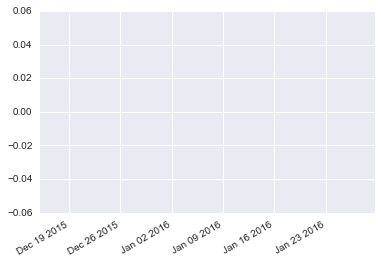

In [1]:
import sys

In [2]:
#alter the line below to correspond to your file system
buoypy_dir = '/Users/nickc/Documents/buoypy'
sys.path.append(buoypy_dir)

In [3]:
import buoypy as bp

In [9]:
reload(bp)
reload(rt)

TypeError: reload() argument must be module

In [ ]:
bp.realtime.

In [41]:
rt = bp.realtime(41013)
ocean_data = rt.get_ocean()
wave_data = rt.get_spec()

In [42]:
ocean_data.head()

,DEPTH,OTMP,COND,SAL,O2%,O2PPM,CLCON,TURB,PH,EH
2016-01-29 20:50:00,1,18.85,48.19,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 20:40:00,1,18.88,48.22,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 20:30:00,1,18.89,48.23,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 20:20:00,1,18.93,48.27,36.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-29 20:10:00,1,18.96,48.31,36.21,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
wave_data.head()

,WVHT,SwH,SwP,WWH,WWP,SwD,WWD,STEEPNESS,APD,MWD
2016-01-29 20:41:00,1.5,0.2,13.8,1.5,4.8,NNW,WSW,VERY_STEEP,4.3,248
2016-01-29 19:41:00,1.3,0.0,NaN,1.3,4.8,NaN,WSW,VERY_STEEP,4.1,247
2016-01-29 18:41:00,1.2,0.3,7.7,1.1,4.8,E,WSW,VERY_STEEP,4.0,257
2016-01-29 17:41:00,1.2,0.4,8.3,1.1,4.8,E,W,VERY_STEEP,4.0,265
2016-01-29 16:41:00,1.1,0.3,10.8,1.0,5.3,SW,W,VERY_STEEP,4.1,264


In [56]:
sns.set_context(context='notebook', font_scale=1.5)
sns.set_style('ticks')

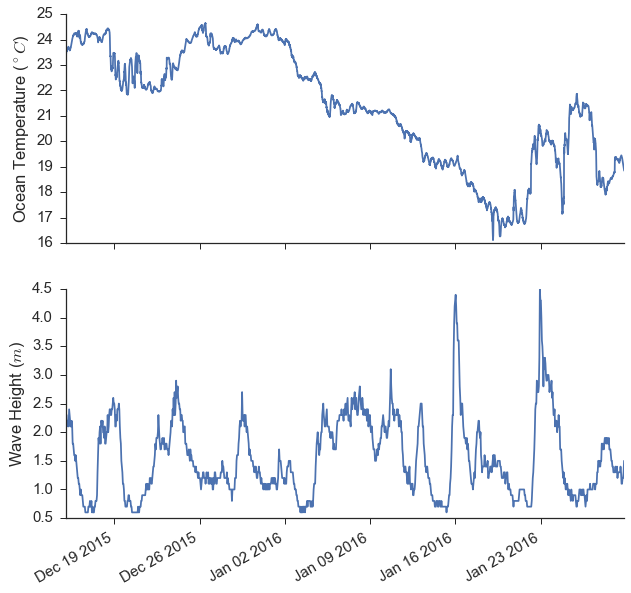

In [68]:
fig,ax = plt.subplots(2,1,figsize = (10,10),sharex=True)

ocean_data['OTMP'].plot(ax=ax[0])
sns.despine()
wave_data['WVHT'].plot(ax=ax[1])
sns.despine()

ax[0].set_ylabel('Ocean Temperature ($^\circ C$)')
ax[1].set_ylabel('Wave Height ($m$)')

plt.savefig('../figures/realtime.png',bbox_inches='tight')

In [10]:
df.WVHT.plot()

In [15]:
df2 = rt.get_swdir()

In [11]:
df.head()

,0.033,0.038,0.043,0.048,0.053,0.058,0.063,0.068,0.073,0.078,...,0.330,0.340,0.350,0.365,0.385,0.405,0.425,0.445,0.465,0.485
2016-01-29 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,272,280,272,264,272,100,88,96,100,108
2016-01-29 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256,272,264,264,268,88,92,80,76,92
2016-01-29 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276,284,272,280,280,96,104,104,104,80
2016-01-29 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280,292,272,284,264,92,104,92,88,80
2016-01-29 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,284,288,288,284,284,100,108,108,96,116


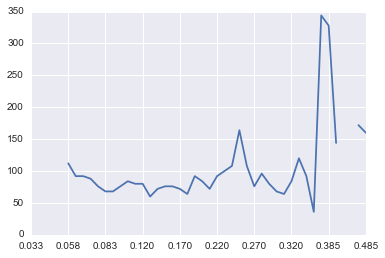

In [14]:
df.iloc[100,:].plot()

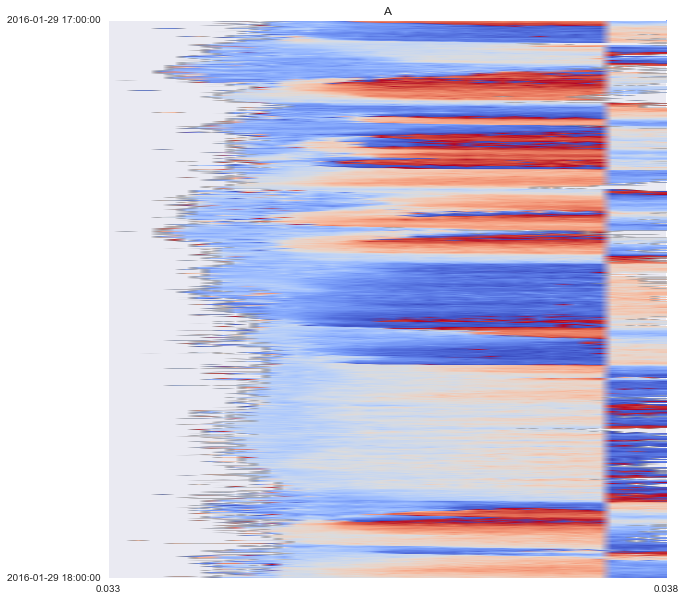

In [9]:
fig,ax1 = plt.subplots(figsize=(10,10))
#ax1 = fig.add_subplot(131)
ax1.set_title("A")
#ax1.tick_params(axis='both', direction='out')
ax1.set_xticks(range(len(df.columns)))
ax1.set_xticklabels(df.columns)
ax1.set_yticks(range(len(df.index)))
ax1.set_yticklabels(df.index)
ax1.imshow(df.values,cmap='coolwarm',extent=[0,1,0,1])

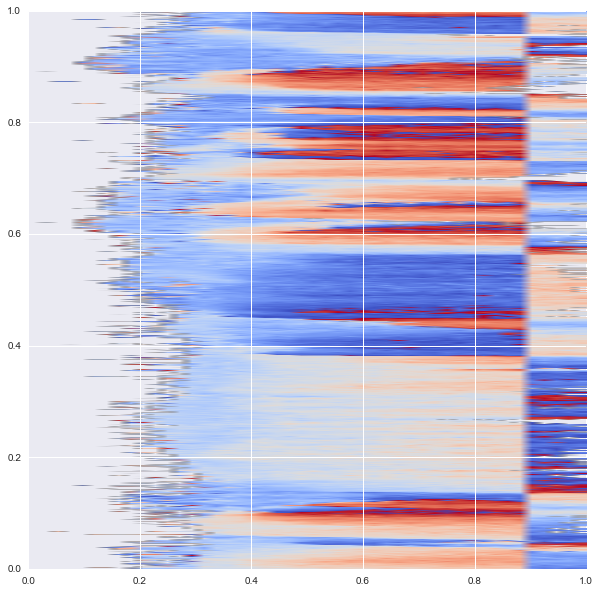

In [10]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(df.values,cmap='coolwarm',extent=[0,1,0,1])


In [56]:
mask = df=='MM'
df[mask]=np.nan
df[['WVHT','SwH','SwP','WWH','WWP','APD','MWD']] = df[['WVHT',
        'SwH','SwP','WWH','WWP','APD','MWD']].astype(float)

In [57]:
df.head()

,WVHT,SwH,SwP,WWH,WWP,SwD,WWD,STEEPNESS,APD,MWD
2016-01-28 20:41:00,1.5,0.8,7.7,1.3,4.8,E,NE,AVERAGE,4.7,91
2016-01-28 19:41:00,1.5,0.5,10.0,1.4,7.1,ESE,ENE,STEEP,4.7,73
2016-01-28 18:41:00,1.6,0.9,7.1,1.3,4.0,E,NE,STEEP,4.9,79
2016-01-28 17:41:00,1.7,1.1,7.1,1.4,5.9,E,ENE,STEEP,5.1,80
2016-01-28 16:41:00,1.7,1.0,7.1,1.3,6.2,E,ENE,STEEP,5.1,79


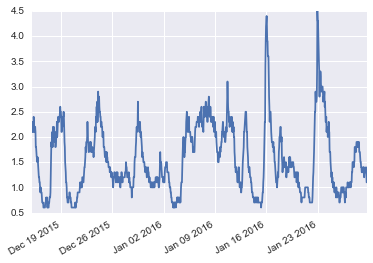

In [15]:
df.WVHT.plot()

In [17]:
df = rt.get_ocean()

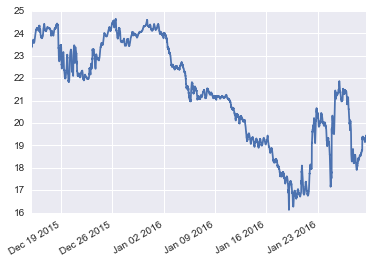

In [19]:
df.OTMP.plot()

In [ ]:
rt.get

In [15]:
from bokeh._legacy_charts import HeatMap, output_file, show
from bokeh.palettes import YlOrRd9 as palette
from bokeh.sampledata.unemployment1948 import data

# pandas magic
#df = data[data.columns[:-1]]
#df2 = df.set_index(df[df.columns[0]].astype(str))
#df2.drop(df.columns[0], axis=1, inplace=True)
#df3 = df2.transpose()

#output_file("cat_heatmap.html")

palette = palette[::-1]  # Reverse the color order so dark red is highest unemployment
hm = HeatMap(df, title="categorical heatmap", width=800, palette=palette)

show(hm)

ImportError: No module named _legacy_charts

In [18]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

In [19]:
output_notebook()

BokehJS successfully loaded.

In [30]:
N = 20
img = np.empty((N,N), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255

#output_file("image_rgba.html", title="image_rgba.py example")

p = figure()
p.rect(np.random.rand(10,10))

show(p)  # open a browser

RuntimeError: Columns need to be 1D (x is not)

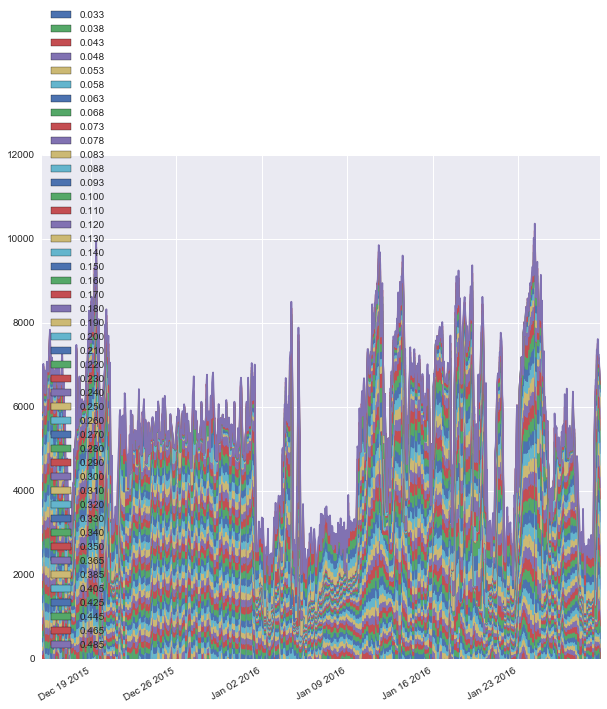

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
df.plot(kind='area',ax=ax)

In [36]:
list(L for layer in range(4))

NameError: global name 'L' is not defined